In [1]:
#Classify images of flowers based on their features such as the petal length, petal width, sepal length, and sepal width? 
#Use the Iris Flowers dataset, which contains information on 150 iris flowers belonging to three different species, 
#and apply SVM or random forest to classify the flowers.

In [23]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import pprint as pp
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from PIL import Image
from IPython.display import Image, display, Markdown

from sklearn import metrics
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import sklearn as sk

In [24]:
#reading the csv file
flowers=pd.read_csv("IRIS_ Flower_Dataset.csv")

Data analysis

In [25]:
#showing the first rows of the flower file
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#showing the last rows of the flower file
flowers.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
#informations about the type, name and number inside every columns
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
flowers.isnull().sum()  #to verify if there are null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
#description with min, max, average of every columns
flowers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


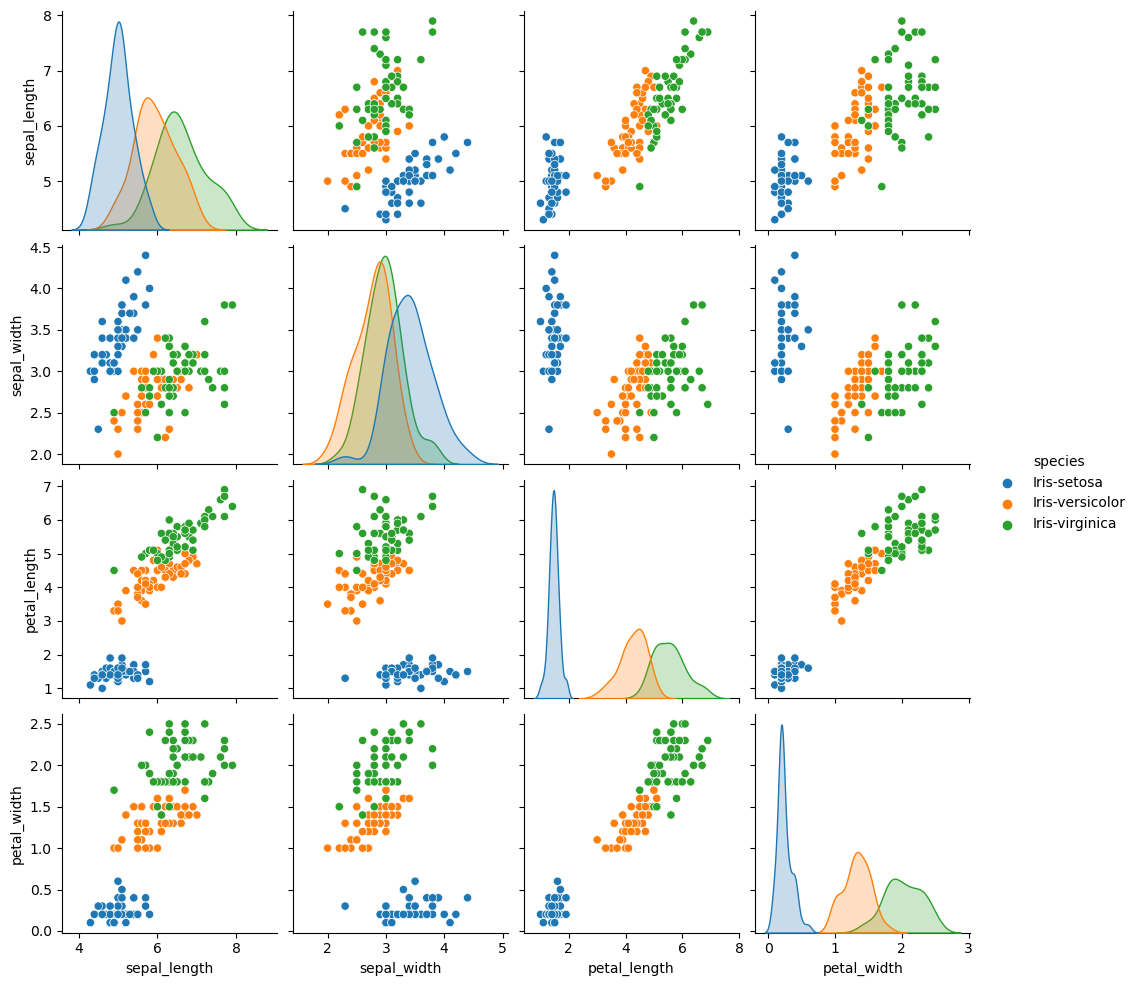

In [32]:
#diagrams of every caracteristics by the specie
sns.pairplot(flowers,hue="species")
plt.show()

Species Analysis

In [33]:
flowers['species'].value_counts()      #number of each species in the sample of 150 flowers

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

C:\Users\fanny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

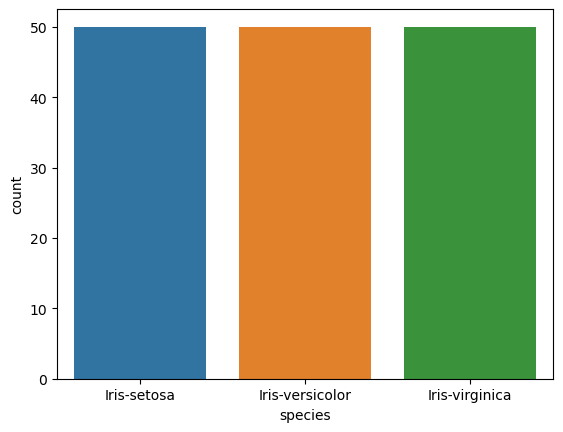

In [34]:
sns.countplot(flowers['species'])             #the graph of species flowers

**iris_setosa**

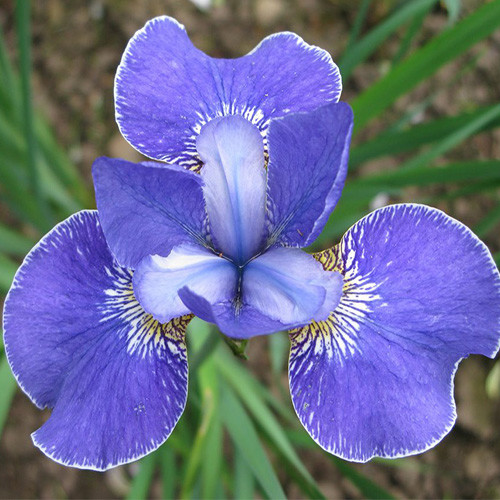

**iris_versicolor**

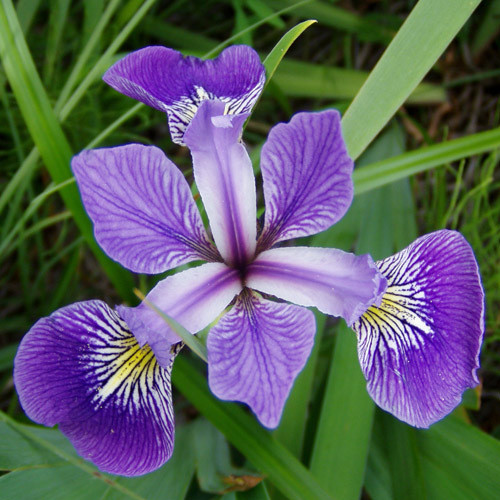

**iris_virginica**

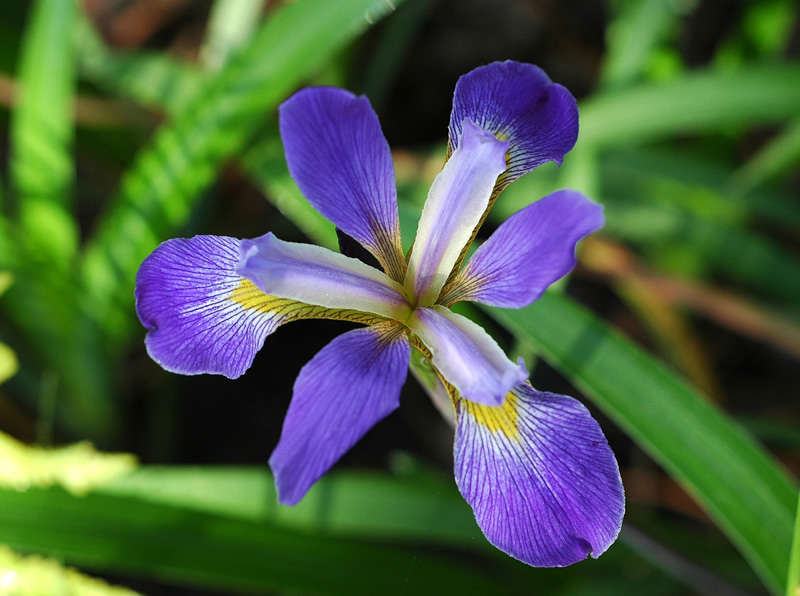

In [35]:
#image of each species
display(Markdown('**iris_setosa**'))  #add a title for the image
display(Image(filename='iris_setosa.jpg')) # Display the first image

display(Markdown('**iris_versicolor**'))
display(Image(filename='iris_versicolor.jpg'))

display(Markdown('**iris_virginica**'))
display(Image(filename='iris_virginica.jpg'))

Graphs

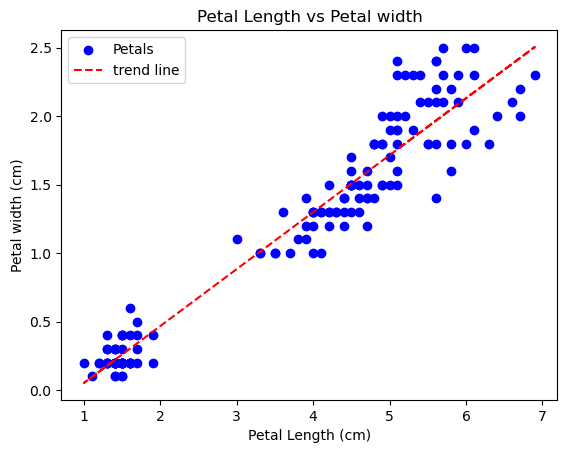

 The correlation coefficient between the length and width of petals : 0.9628654314027961


In [36]:
# Creating a dataframe
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

petal_length = X['petal length (cm)']
petal_width = X['petal width (cm)']

# Creating the graphic
plt.scatter(petal_length, petal_width, marker='o', color='b', label='Petals')

# title and labels
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal Length vs Petal width')

# Linear regression of the graphic
model = LinearRegression()
X_petal_length = petal_length.values.reshape(-1, 1)
model.fit(X_petal_length, petal_width)
y_pred = model.predict(X_petal_length)

# Line of the linear regression
plt.plot(petal_length, y_pred, color='r', linestyle='--', label='trend line')

plt.legend()
plt.show()

# Calcul of the correlation coefficient de corrélation between the length and width of petals
correlation_coefficient = np.corrcoef(petal_length, petal_width)[0, 1]

print(f" The correlation coefficient between the length and width of petals : {correlation_coefficient}")

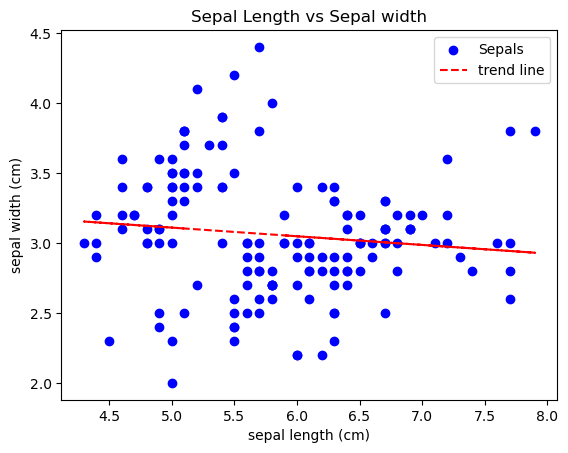

 The correlation coefficient between the length and width of sepals : -0.11756978413300208


In [37]:
# Creating a dataframe
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

sepal_length = X['sepal length (cm)']
sepal_width = X['sepal width (cm)']

# Creating the graphic
plt.scatter(sepal_length, sepal_width, marker='o', color='b', label='Sepals')

# title and labels
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal Length vs Sepal width')

# Linear regression of the graphic
model = LinearRegression()
X_sepal_length = sepal_length.values.reshape(-1, 1)
model.fit(X_sepal_length, sepal_width)
y_pred = model.predict(X_sepal_length)

# Line of the linear regression
plt.plot(sepal_length, y_pred, color='r', linestyle='--', label='trend line')

plt.legend()
plt.show()

# Calcul of the correlation coefficient de corrélation between the length and width of sepals
correlation_coefficient = np.corrcoef(sepal_length, sepal_width)[0, 1]

print(f" The correlation coefficient between the length and width of sepals : {correlation_coefficient}")

<AxesSubplot:>

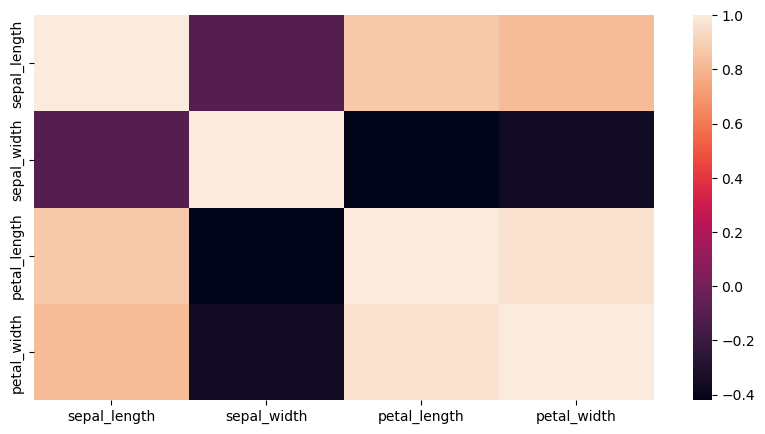

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(flowers.corr())

Train Test

In [39]:
# Separating the datas : 70% for train and 30% for test
train, test = train_test_split(flowers, test_size = 0.3) 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [40]:
X_train= train[['sepal_length','sepal_width','petal_length','petal_width']]   
y_train=train.species                                                              
X_test= test[['sepal_length','sepal_width','petal_length','petal_width']]      
y_test=test.species  

In [41]:
#logistic regression model on the training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9555555555555556


Random Forest

In [42]:
#Creating a random model with 100 tests
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
#Predicting the model we made
y_pred = rf_classifier.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print(classification_report(y_test, y_pred))


Accuracy : 0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.84      0.89        19
 Iris-virginica       0.77      0.91      0.83        11

       accuracy                           0.91        45
      macro avg       0.90      0.92      0.91        45
   weighted avg       0.92      0.91      0.91        45



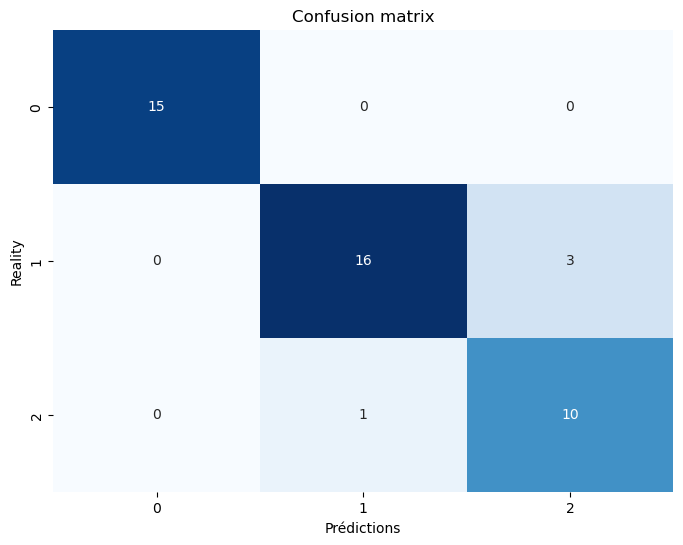

In [45]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Prédictions')
plt.ylabel('Reality')
plt.show()